# Titanic - Machine Learning from Disaster

### About the Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Dataset: [Link](https://www.kaggle.com/competitions/titanic/data)

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.shape

(891, 12)

In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test.shape

(418, 11)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
columns = ['Sex', 'Age', 'Pclass', 'SibSp','Parch','Fare','Cabin','Embarked']

print(train[columns].describe(include='all', percentiles=[]))

         Sex         Age      Pclass       SibSp       Parch        Fare  \
count    891  714.000000  891.000000  891.000000  891.000000  891.000000   
unique     2         NaN         NaN         NaN         NaN         NaN   
top     male         NaN         NaN         NaN         NaN         NaN   
freq     577         NaN         NaN         NaN         NaN         NaN   
mean     NaN   29.699118    2.308642    0.523008    0.381594   32.204208   
std      NaN   14.526497    0.836071    1.102743    0.806057   49.693429   
min      NaN    0.420000    1.000000    0.000000    0.000000    0.000000   
50%      NaN   28.000000    3.000000    0.000000    0.000000   14.454200   
max      NaN   80.000000    3.000000    8.000000    6.000000  512.329200   

          Cabin Embarked  
count       204      889  
unique      147        3  
top     B96 B98        S  
freq          4      644  
mean        NaN      NaN  
std         NaN      NaN  
min         NaN      NaN  
50%         NaN      Na

In [8]:
print(test[columns].describe(include='all', percentiles=[]))

         Sex         Age      Pclass       SibSp       Parch        Fare  \
count    418  332.000000  418.000000  418.000000  418.000000  417.000000   
unique     2         NaN         NaN         NaN         NaN         NaN   
top     male         NaN         NaN         NaN         NaN         NaN   
freq     266         NaN         NaN         NaN         NaN         NaN   
mean     NaN   30.272590    2.265550    0.447368    0.392344   35.627188   
std      NaN   14.181209    0.841838    0.896760    0.981429   55.907576   
min      NaN    0.170000    1.000000    0.000000    0.000000    0.000000   
50%      NaN   27.000000    3.000000    0.000000    0.000000   14.454200   
max      NaN   76.000000    3.000000    8.000000    9.000000  512.329200   

                  Cabin Embarked  
count                91      418  
unique               76        3  
top     B57 B59 B63 B66        S  
freq                  3      270  
mean                NaN      NaN  
std                 NaN      

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [11]:
corr = train.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


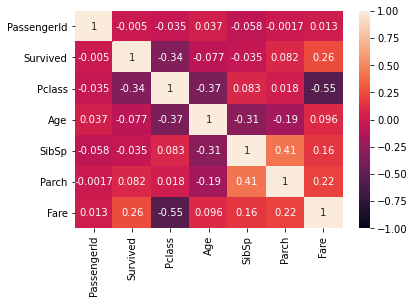

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(corr,vmin=-1, vmax=1, annot=True)
plt.show()

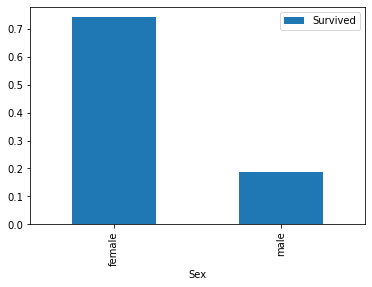

In [13]:
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

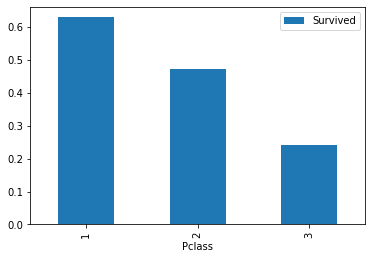

In [14]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

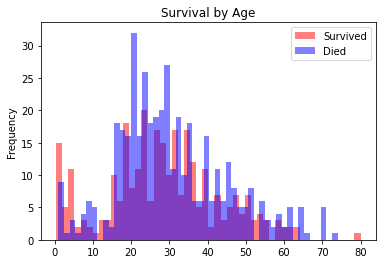

In [16]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

survived['Age'].plot.hist(alpha=0.5, color='red', bins=50)
died['Age'].plot.hist(alpha=0.5, color='blue', bins=50)
plt.legend(['Survived', 'Died'])
plt.title('Survival by Age')
plt.show()

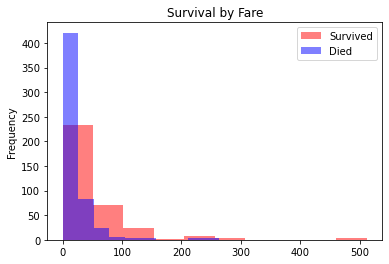

In [17]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

survived['Fare'].plot.hist(alpha=0.5, color='red')
died['Fare'].plot.hist(alpha=0.5, color='blue')
plt.legend(['Survived', 'Died'])
plt.title('Survival by Fare')
plt.show()

In [18]:
explore_cols = ['SibSp', 'Parch', 'Survived']
explore = train[explore_cols].copy()
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SibSp     891 non-null    int64
 1   Parch     891 non-null    int64
 2   Survived  891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


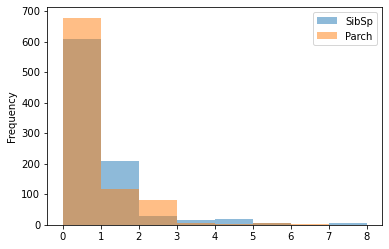

In [19]:
explore.drop('Survived', axis=1).plot.hist(alpha=0.5, bins=8)
plt.show()

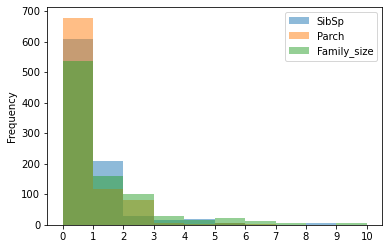

In [20]:
explore['Family_size'] = explore[['SibSp', 'Parch']].sum(axis=1)
explore.drop('Survived', axis=1).plot.hist(alpha=0.5, bins=10)
plt.xticks(range(11))
plt.show()

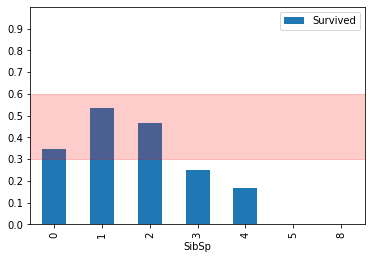

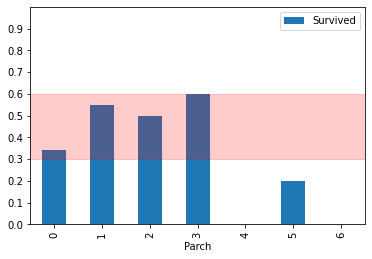

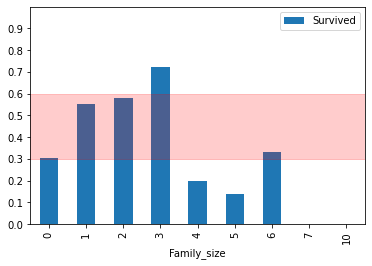

In [21]:
import numpy as np

for col in explore.columns.drop('Survived'):
    pivot = explore.pivot_table(index=col, values='Survived')
    pivot.plot.bar(ylim=(0,1), yticks=np.arange(0,1,.1))
    plt.axhspan(.3, .6, alpha=0.2, color='red')
    plt.show()

The 'SibSp' column shows the number of siblings and/or spouses each passenger had on board, while the 'Parch' columns shows the number of parents or children each passenger had onboard. Neither column has any missing values.

We combined both columns and created the 'Family_size' which shows that only 30% of the passengers who had no family members onboard survived.

Based on this, we are going to create new feature which determines whether the passenger is alone or not. It will be a binary column containing the value:

1 if the passenger has zero family members onboard
0 if the passenger has one or more family members onboard
On the next step, we will also turn some of tcontinous numerical columns into categorical columns by dividing it into ranges. We might also need to deal with missing values.

### Feature Engineering

In [22]:
def process_missing(df):
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Embarked'] = df['Embarked'].fillna('S')
    
    return df

In [23]:
def process_age(df):
    df['Age'] = df['Age'].fillna(-0.5)
    cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
    label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 
                   'Senior']
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    
    return df

In [24]:
def process_fare(df):
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df['Fare_categories'] = pd.cut(df['Fare'], cut_points, labels=label_names)

    return df

In [25]:
def process_cabin(df):
    df['Cabin_type'] = df['Cabin'].str[0]
    df['Cabin_type'] = df['Cabin_type'].fillna('Unknown')
    df.drop('Cabin', axis=1)
    
    return df

In [26]:
def process_titles(df):
    titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
    }
    
    extracted_titles = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    df['Title'] = extracted_titles.map(titles)
    
    return df

In [27]:
def process_isalone(df):
    df['Family_size'] = df[['SibSp', 'Parch']].sum(axis=1)
    df['is_alone'] = 0
    df.loc[(df['Family_size']==0), 'is_alone'] = 1
    df.drop('Family_size', axis=1)
    
    return df

Most machine learning algorithms can not understand text labels. So, we are going to convert it into numbers by creating dummy columns.

In [28]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [29]:
def pre_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_cabin(df)
    df = process_titles(df)
    df = process_isalone(df)
    
    for column in ['Sex', 'Age_categories', 'Fare_categories', 'Title','Cabin_type']:
        df = create_dummies(df, column)
        
    return df

In [30]:
train = pre_process(train)
test = pre_process(test)

### Feature Selection

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    # Remove non-numeric columns, columns that have null values
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(['Survived', 'PassengerId'], axis=1)
    all_y = df['Survived']
    
    rf = RandomForestClassifier(random_state=1)
    selector = RFECV(rf, cv=10)
    selector.fit(all_X, all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    
    print('Best columns \n' + '-'*12 + '\n{}\n'.format(best_columns))
    
    return best_columns

features = select_features(train)

Best columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'is_alone', 'Sex_female', 'Sex_male', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown']



### Model Selection

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df, features):
    all_X = df[features]
    all_y = df['Survived']
    
    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    
    models = [
        {
            'name' : 'LogisticRegression',
            'estimator' : LogisticRegression(),
            'hyperparameters' : {
                'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                'max_iter' : [3000]
            }
        },
        {
            'name' : 'KNeigborsClassifier',
            'estimator' : KNeighborsClassifier(),
            'hyperparameters' : {
                'n_neighbors' : range(1, 20, 2),
                'weights' : ['distance', 'uniform'],
                'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'p' : [1, 2]
            }
        },
        {
            'name' : 'RandomForestClassifier',
            'estimator' : RandomForestClassifier(),
            'hyperparameters' : {
                'n_estimators' : [4, 6, 9],
                'criterion' : ['entropy', 'gini'],
                'max_depth' : [2, 5, 10],
                'max_features' : ['log2', 'sqrt'],
                'min_samples_leaf' : [1, 5, 8],
                'min_samples_split' : [2, 3, 5]
            }
        }
    ] 
    
    for model in models:
        print(model['name'])
        print('-' * len(model['name']))
        
        grid = GridSearchCV(model['estimator'], param_grid = model['hyperparameters'], 
                            cv=10)
        grid.fit(all_X, all_y)
        model['best_param'] = grid.best_params_
        model['best_score'] = grid.best_score_
        model['best_model'] = grid.best_estimator_
        
        print('Best Score : {}'.format(model['best_score']))
        print('Best Parameters : {}\n'.format(model['best_param']))
        
    return models

In [33]:
result = select_model(train, features)

LogisticRegression
------------------
Best Score : 0.8204619225967541
Best Parameters : {'max_iter': 3000, 'solver': 'newton-cg'}

KNeigborsClassifier
-------------------
Best Score : 0.7800249687890137
Best Parameters : {'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score : 0.8429213483146067
Best Parameters : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}



### Output File

In [ ]:
def save_submission_file(model, features, filename='submission.csv'):
    predictions = model.predict(test[features])
    
    output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
    output.to_csv('submission.csv', index=False)
    
    print("Your submission was successfully saved!")

In [ ]:
best_rf_model = result[2]['best_model']
save_submission_file(best_rf_model, features)